https://www.kaggle.com/datasets/sid321axn/heart-statlog-cleveland-hungary-final

In [ ]:

# TODO: Entender o gridSearch no MLP
# TODO: Fazer o ensemble dos 3 modelos 


## Pre-processing

In [30]:
import pandas as pd
import numpy as np

In [31]:
raw = pd.read_csv('heart.csv')
raw.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [32]:
raw.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [33]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


### Outliers

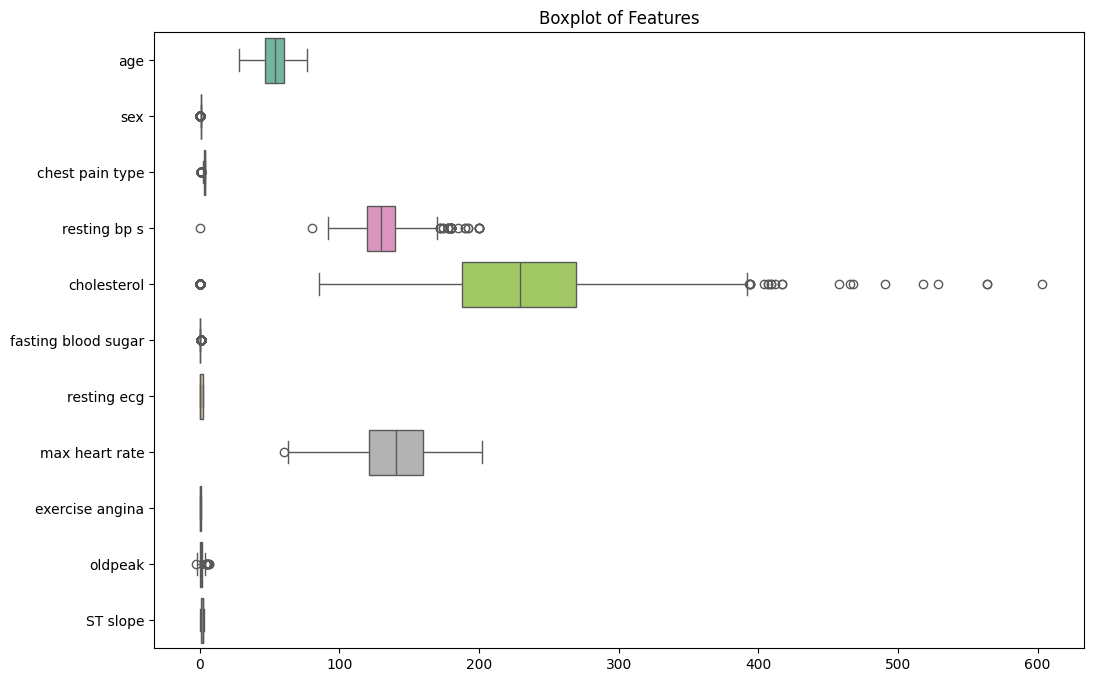

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=raw.drop(columns="target"), orient='h', palette='Set2')
plt.title('Boxplot of Features')
plt.show()


In [35]:
def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (3 * IQR)
    upper_bound = Q3 + (3 * IQR)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [36]:
remOutliers = remove_extreme_outliers(raw, 'cholesterol')
remOutliers.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000
mean,53.716456,0.764557,3.232068,132.185654,208.907173,0.213502,0.697890,139.727426,0.388186,0.923122,1.622785,0.528270
std,9.340713,0.424455,0.936850,18.385538,99.097395,0.409952,0.869842,25.551170,0.487543,1.087609,0.611258,0.499411
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,141.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,491.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [37]:
chol_median = remOutliers['cholesterol'].median()
remOutliers['cholesterol'] = remOutliers['cholesterol'].replace(0, chol_median)
remOutliers.describe()

C:\Users\carli\AppData\Local\Temp\ipykernel_28772\4259170771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remOutliers['cholesterol'] = remOutliers['cholesterol'].replace(0, chol_median)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000
mean,53.716456,0.764557,3.232068,132.185654,242.145992,0.213502,0.697890,139.727426,0.388186,0.923122,1.622785,0.528270
std,9.340713,0.424455,0.936850,18.385538,49.328239,0.409952,0.869842,25.551170,0.487543,1.087609,0.611258,0.499411
min,28.000000,0.000000,1.000000,0.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,214.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,141.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,491.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


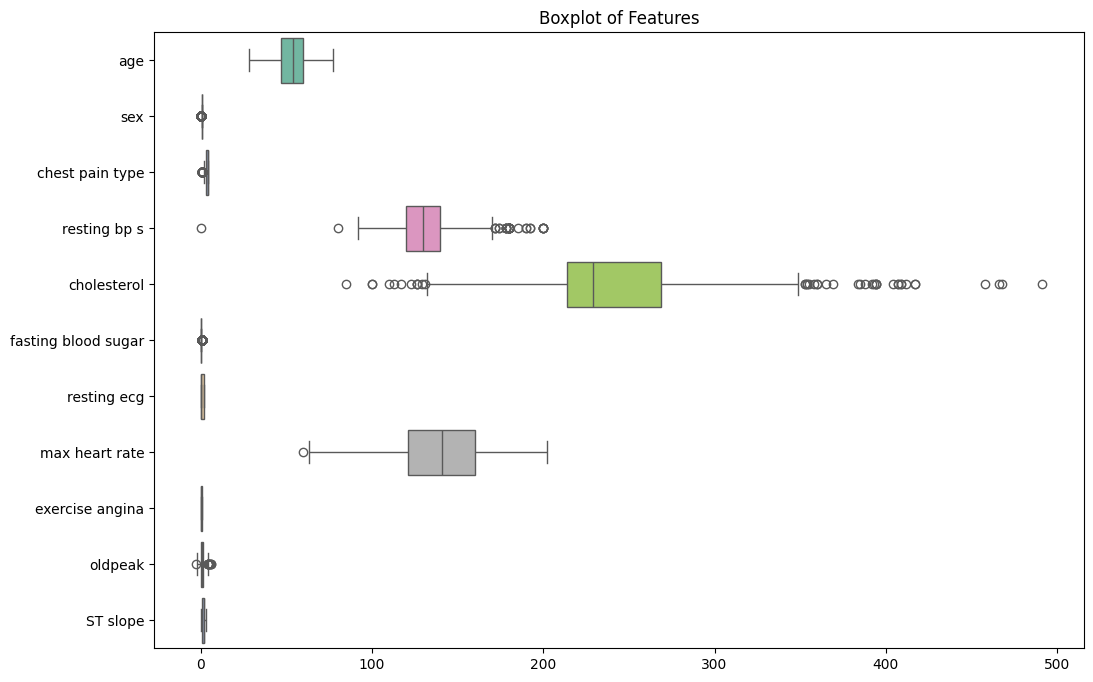

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=remOutliers.drop(columns="target"), orient='h', palette='Set2')
plt.title('Boxplot of Features')
plt.show()

### Scalling

In [39]:

from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()

scaled = remOutliers.copy()
for column in scaled.columns:
    if column != 'target':
        scaled[column] = scaller.fit_transform(scaled[[column]])

scaled.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1.185000e+03,1.185000e+03,1.185000e+03,1.185000e+03,1.185000e+03,1185.000000,1.185000e+03,1.185000e+03,1.185000e+03,1.185000e+03,1.185000e+03,1185.000000
mean,1.678920e-16,2.398456e-17,-4.796913e-17,-6.955524e-16,5.996141e-17,0.000000,2.398456e-17,-1.918765e-16,7.794984e-17,-3.597685e-17,-1.199228e-17,0.528270
std,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,0.499411
min,-2.754320e+00,-1.802030e+00,-2.383531e+00,-7.192689e+00,-3.187066e+00,-0.521017,-8.026569e-01,-3.121622e+00,-7.965443e-01,-3.240695e+00,-2.655951e+00,0.000000
25%,-7.193553e-01,5.549297e-01,-2.478151e-01,-6.630646e-01,-5.708267e-01,-0.521017,-8.026569e-01,-7.332476e-01,-7.965443e-01,-8.491212e-01,-1.019288e+00,0.000000
50%,3.036856e-02,5.549297e-01,8.200428e-01,-1.189292e-01,-2.666128e-01,-0.521017,-8.026569e-01,4.982594e-02,-7.965443e-01,-2.972196e-01,6.173739e-01,1.000000
75%,6.729890e-01,5.549297e-01,8.200428e-01,4.252062e-01,5.446241e-01,-0.521017,1.497581e+00,7.937458e-01,1.255423e+00,6.226164e-01,6.173739e-01,1.000000
max,2.493747e+00,5.549297e-01,8.200428e-01,3.690019e+00,5.046989e+00,1.919321,1.497581e+00,2.438200e+00,1.255423e+00,4.853862e+00,2.254036e+00,1.000000


### Spliting

In [40]:
from sklearn.model_selection import train_test_split

X = scaled.drop(columns='target')
y = scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## KNN

### Hyperparams

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'n_jobs': [1, 10, 20, 30]
}

knn_test = KNeighborsClassifier()

grid_search = GridSearchCV(knn_test, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best f1 score: ", grid_search.best_score_)

Best parameters found:  {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_jobs': 1, 'n_neighbors': 11, 'weights': 'distance'}
Best f1 score:  0.9135732859841725


### Cross Validation

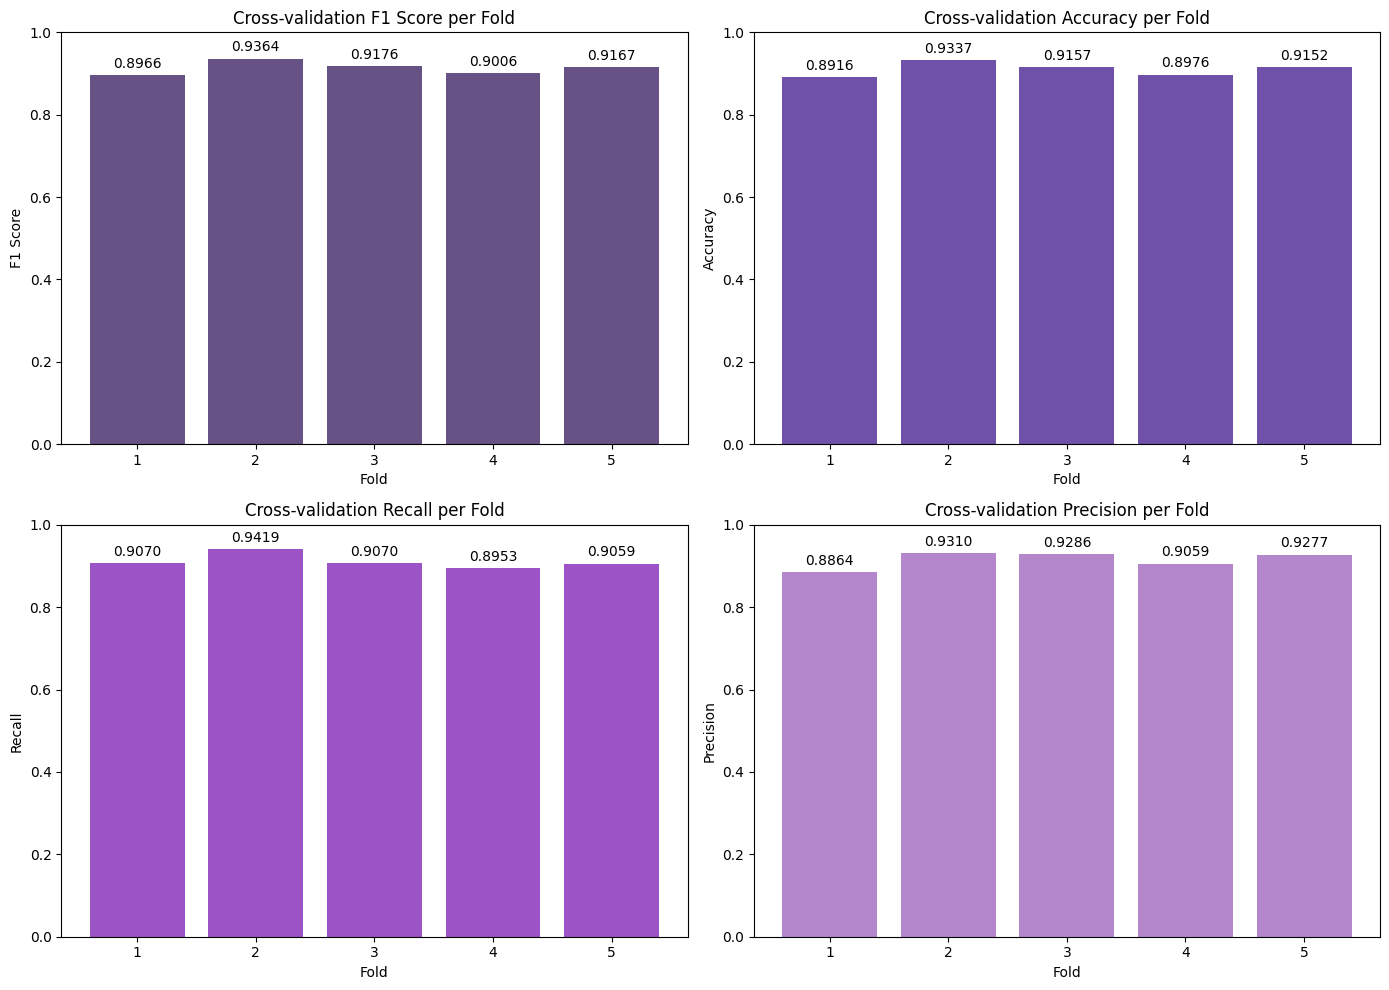

,F1 Score,Accuracy,Recall,Precision
0,0.913573,0.910741,0.911409,0.915913


In [42]:

from sklearn.model_selection import cross_val_score

knn_best = KNeighborsClassifier(**grid_search.best_params_)
knn_best.fit(X_train, y_train)


metrics = {
    'F1 Score': 'f1',
    'Accuracy': 'accuracy',
    'Recall': 'recall',
    'Precision': 'precision'
}
purple_shades = ["#260853", "#330785", "#720aad", "#9455b9"]



#* Comparation of metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (metric_name, metric) in enumerate(metrics.items()):
    scores = cross_val_score(knn_best, X_train, y_train, cv=5, scoring=metric)
    bars = axes[idx].bar(range(1, 6), scores, color=purple_shades[idx % len(purple_shades)], alpha=0.7)
    axes[idx].set_title(f'Cross-validation {metric_name} per Fold')
    axes[idx].set_xlabel('Fold')
    axes[idx].set_ylabel(metric_name)
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xticks(range(1, 6))
    for bar, score in zip(bars, scores):
        axes[idx].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{score:.4f}", ha='center', va='bottom')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()

#* Mean scores
mean_scores = {metric_name: cross_val_score(knn_best, X_train, y_train, cv=5, scoring=metric).mean() for metric_name, metric in metrics.items()}
mean_scores_df = pd.DataFrame(mean_scores, index=[0])
mean_scores_df



### Confusion Matrix

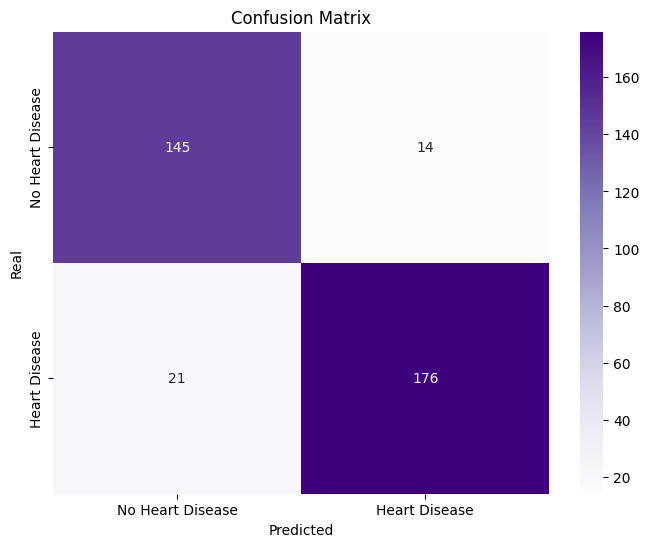

,F1 Score,Accuracy,Recall,Precision,Specificity
0,0.913573,0.910741,0.911409,0.915913,0.91195


In [43]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(**grid_search.best_params_)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

tn, fp, fn, tp = cm.ravel()
specificity_knn = tn / (tn + fp)
mean_scores_df['Specificity'] = specificity_knn
mean_scores_df


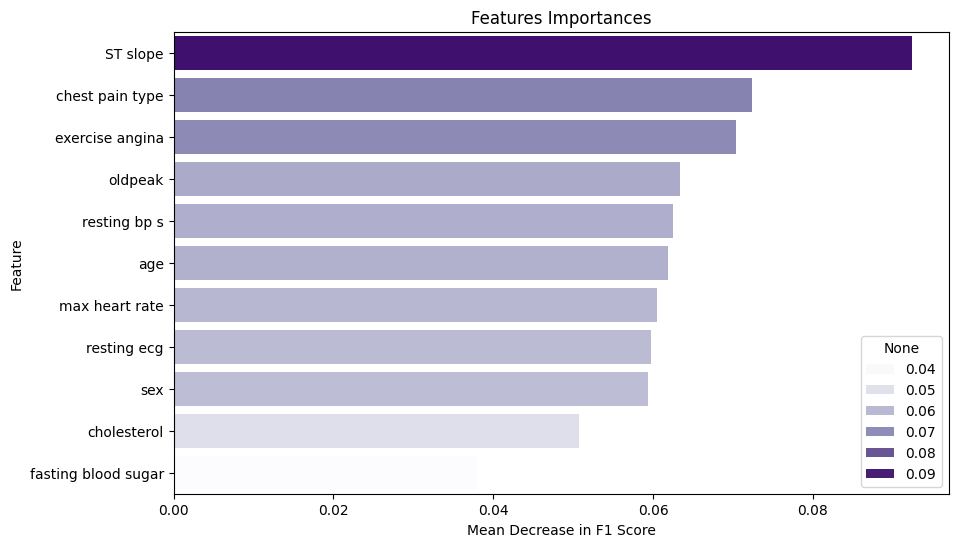

In [44]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, X_train, y_train, n_repeats=10, random_state=42, scoring='f1')

importances = pd.Series(result.importances_mean, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index, hue=importances, palette='Purples')
plt.title("Features Importances")
plt.xlabel("Mean Decrease in F1 Score")
plt.ylabel("Feature")
plt.show()


## Random Forest

### Hyperparams

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [10, 50, 100, 200],
    "max_features": [None, "sqrt", "log2"],
    "class_weight": [None, "balanced", "balanced_subsample"]
}

rf_test = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf_test, param_grid, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)

print("Best parameters found for Random Forest: ", grid_search_rf.best_params_)
print("Best f1 score for Random Forest: ", grid_search_rf.best_score_)

### Cross Validation

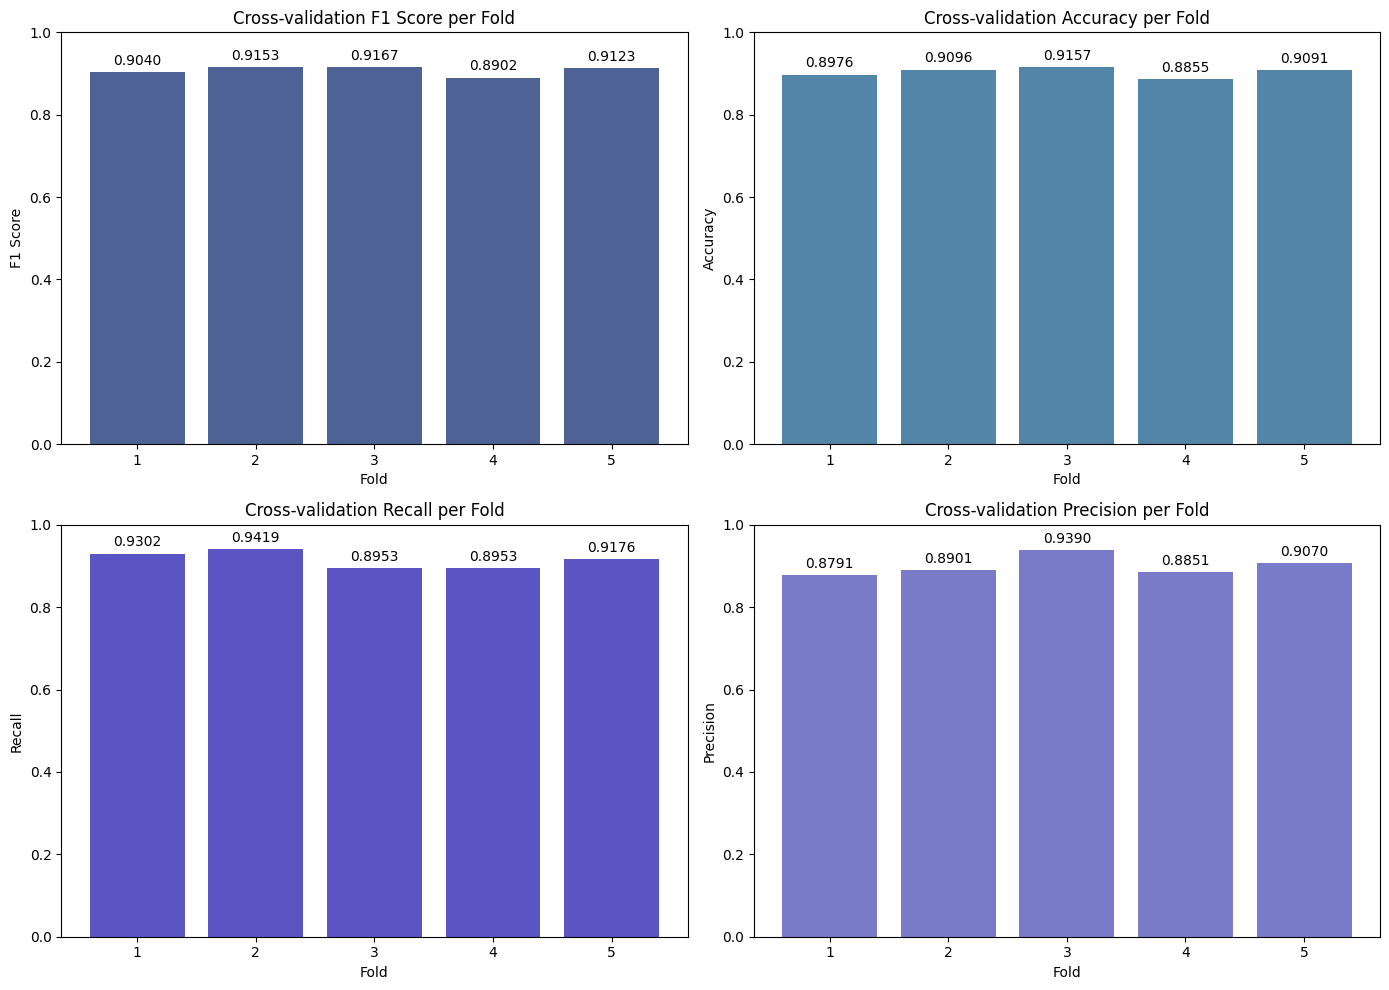

,F1 Score,Accuracy,Recall,Precision
0,0.907666,0.903505,0.916088,0.900058


In [ ]:

from sklearn.model_selection import cross_val_score

rf_best = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
rf_best.fit(X_train, y_train)

metrics = {
    'F1 Score': 'f1',
    'Accuracy': 'accuracy',
    'Recall': 'recall',
    'Precision': 'precision'
}

blue_shades = ["#041F68", "#0a5283", "#150baa", "#4143b1"]

#* Comparation of metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (metric_name, metric) in enumerate(metrics.items()):
    scores = cross_val_score(rf_best, X_train, y_train, cv=5, scoring=metric)
    bars = axes[idx].bar(range(1, 6), scores, color=blue_shades[idx % len(blue_shades)], alpha=0.7)
    axes[idx].set_title(f'Cross-validation {metric_name} per Fold')
    axes[idx].set_xlabel('Fold')
    axes[idx].set_ylabel(metric_name)
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xticks(range(1, 6))
    for bar, score in zip(bars, scores):
        axes[idx].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{score:.4f}", ha='center', va='bottom')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()

#* Mean scores
mean_scores_rf = {metric_name: cross_val_score(rf_best, X_train, y_train, cv=5, scoring=metric).mean() for metric_name, metric in metrics.items()}
mean_scores_rf_df = pd.DataFrame(mean_scores_rf, index=[0])
mean_scores_rf_df


### Confusion Matrix

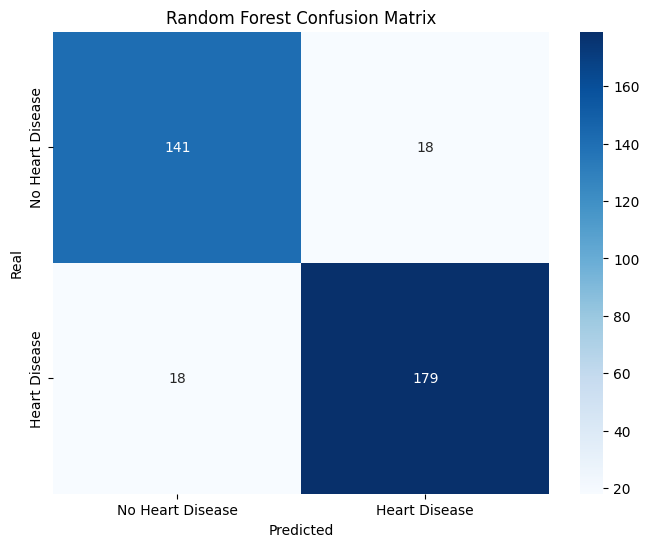

,F1 Score,Accuracy,Recall,Precision,Specificity
0,0.913573,0.910741,0.911409,0.915913,0.886792


In [ ]:
rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

tn, fp, fn, tp = cm_rf.ravel()
specificity_RF = tn / (tn + fp)
mean_scores_df['Specificity'] = specificity_RF
mean_scores_df


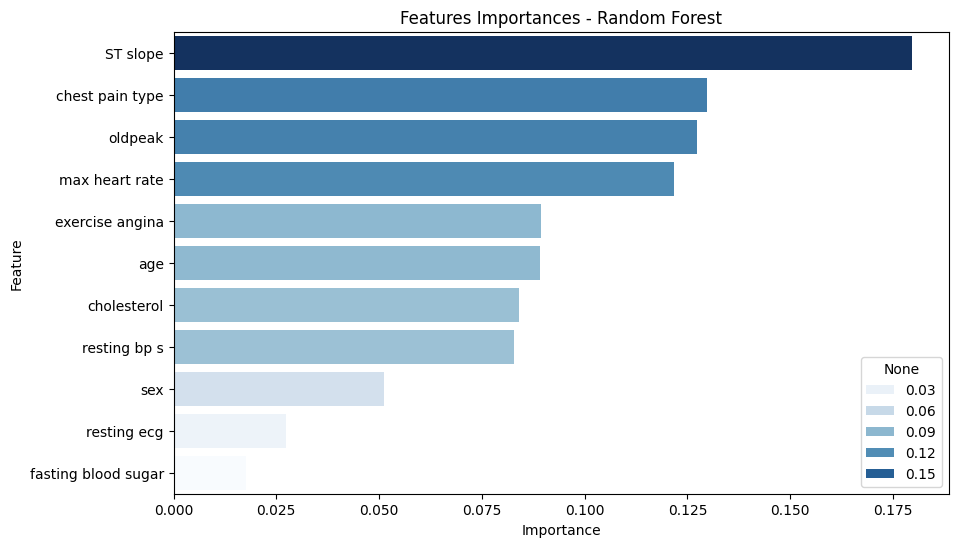

In [ ]:
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
importances_rf = importances_rf.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf, y=importances_rf.index, hue=importances_rf, palette='Blues')
plt.title("Features Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## MLP

### Hyperparams

In [19]:
from sklearn.neural_network import MLPClassifier

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive'],
    'solver': ['adam', 'sgd'],
}

mlp_test = MLPClassifier(early_stopping=True, random_state=42, max_iter=10000)

grid_search_mlp = GridSearchCV(mlp_test, param_grid_mlp, cv=5, scoring='f1')
grid_search_mlp.fit(X_train, y_train)

print("Best parameters found for MLP: ", grid_search_mlp.best_params_)
print("Best f1 score for MLP: ", grid_search_mlp.best_score_)

Best parameters found for MLP:  {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best f1 score for MLP:  0.8359338530592959


In [22]:
mlp_test = MLPClassifier(early_stopping=False, random_state=42, max_iter=10000)

grid_search_mlp = GridSearchCV(mlp_test, param_grid_mlp, cv=5, scoring='f1')
grid_search_mlp.fit(X_train, y_train)

print("Best parameters found for MLP: ", grid_search_mlp.best_params_)
print("Best f1 score for MLP: ", grid_search_mlp.best_score_)

Best parameters found for MLP:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best f1 score for MLP:  0.8907521905301191


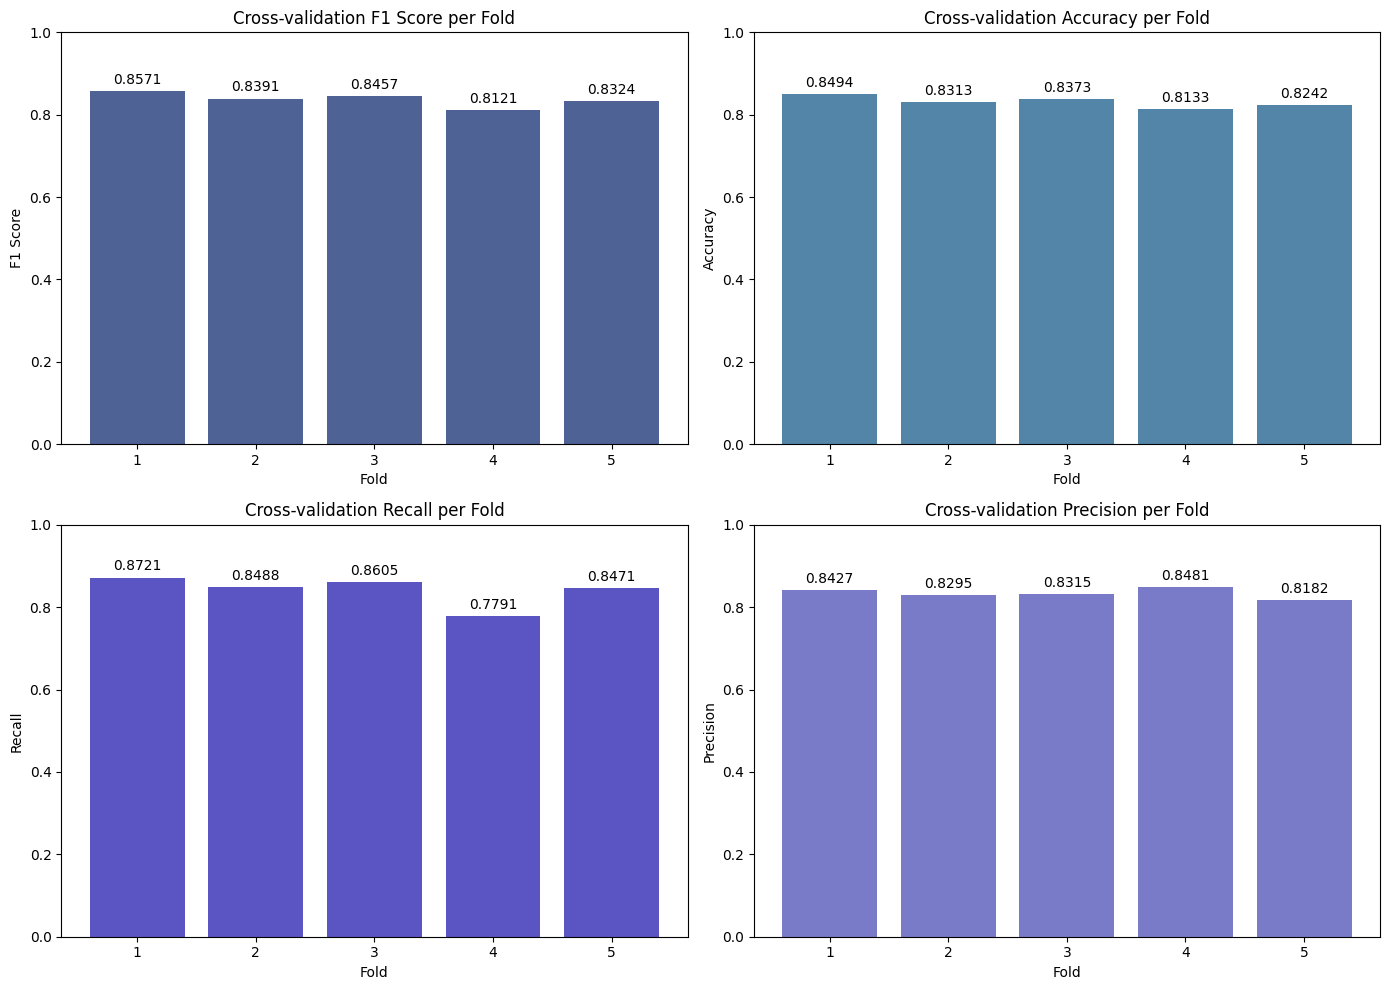

,F1 Score,Accuracy,Recall,Precision
0,0.837286,0.831114,0.841505,0.833997


In [ ]:
# mlp_test2 = MLPClassifier(**grid_search_mlp.best_params_, random_state=42, max_iter=10000)
# mlp_test2.fit(X_train, y_train)


# metrics = {
#     'F1 Score': 'f1',
#     'Accuracy': 'accuracy',
#     'Recall': 'recall',
#     'Precision': 'precision'
# }

# blue_shades = ["#04610C", "#098f26", "#5be40c", "#5e9222"]

# #* Comparison of metrics
# fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# axes = axes.flatten()

# for idx, (metric_name, metric) in enumerate(metrics.items()):
#     scores = cross_val_score(mlp_test2, X_train, y_train, cv=5, scoring=metric)
#     bars = axes[idx].bar(range(1, 6), scores, color=blue_shades[idx % len(blue_shades)], alpha=0.7)
#     axes[idx].set_title(f'Cross-validation {metric_name} per Fold')
#     axes[idx].set_xlabel('Fold')
#     axes[idx].set_ylabel(metric_name)
#     axes[idx].set_ylim(0, 1)
#     axes[idx].set_xticks(range(1, 6))
#     for bar, score in zip(bars, scores):
#         axes[idx].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{score:.4f}", ha='center', va='bottom')
#     axes[idx].grid(False)

# plt.tight_layout()
# plt.show()

# #* Mean scores
# mean_scores_mlp = {metric_name: cross_val_score(mlp_test2, X_train, y_train, cv=5, scoring=metric).mean() for metric_name, metric in metrics.items()}
# mean_scores_mlp_df = pd.DataFrame(mean_scores_mlp, index=[0])
# mean_scores_mlp_df